# Yet, Another Housing Prices Problem!

## Step #00: Understand the Problem and the Given Data

- Before we delve into the California Housing Prices dataset, **it's essential to take the time to understand the problem at hand and the data we'll be working with**. Properly comprehending the problem and data is critical for ensuring the **accuracy** and **effectiveness** of our machine learning model.

- Here are a **few key points** to keep in mind:

> - **The problem:**
>> - Our goal is to **predict housing prices in California** based on information collected in the 1990 census.
>> - We need to **understand which variables in the dataset may have a significant impact on housing prices**.

> - **The data:**
>> - The dataset contains a **range of variables**, including median house values, household income, location, and more.
>> - We need to examine the data to understand its **quality**, **potential biases**, and **any missing or irrelevant data** that may impact the model's accuracy.

> - **Data limitations:**
>> - It's important to **understand the limitations of the data we're working with**, as it was collected in 1990. We need to be mindful of any changes that have occurred since then and how these changes may affect our model's accuracy.

- By understanding the **problem** and** data**, we can better prepare ourselves for the subsequent steps of data **exploration**, **cleaning**, and **analysis**.
- **With a solid foundation in place, we can build an accurate and effective machine learning model!**

## Step #01: Set up the Workspace:

In [1]:
from copy import deepcopy
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold, learning_curve, RandomizedSearchCV, train_test_split, validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

## Step #02: Data Wrangling

### Get the data

- **Read the data:**

In [2]:
cal_housing_prices = pd.read_csv("./datasets/housing.csv")

### Assess & clean the data

- **Explore its shape & size:**

In [3]:
cal_housing_prices.shape

(20640, 10)

- **Print the first few rows to get a sense of the data:**

In [4]:
cal_housing_prices.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- **View some metadata:**

In [5]:
cal_housing_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- **View some summary statistics & viz:**

In [6]:
cal_housing_prices.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


- **Plot the distribution of numerical columns (to choose a suitable scaling technique later on):**

In [7]:
# List all columns according to dtype:
cat_cols = cal_housing_prices.select_dtypes(include="object").columns.tolist()
target_col = ["median_house_value"]
num_cols = [c for c in cal_housing_prices.columns if c not in (cat_cols + target_col)]

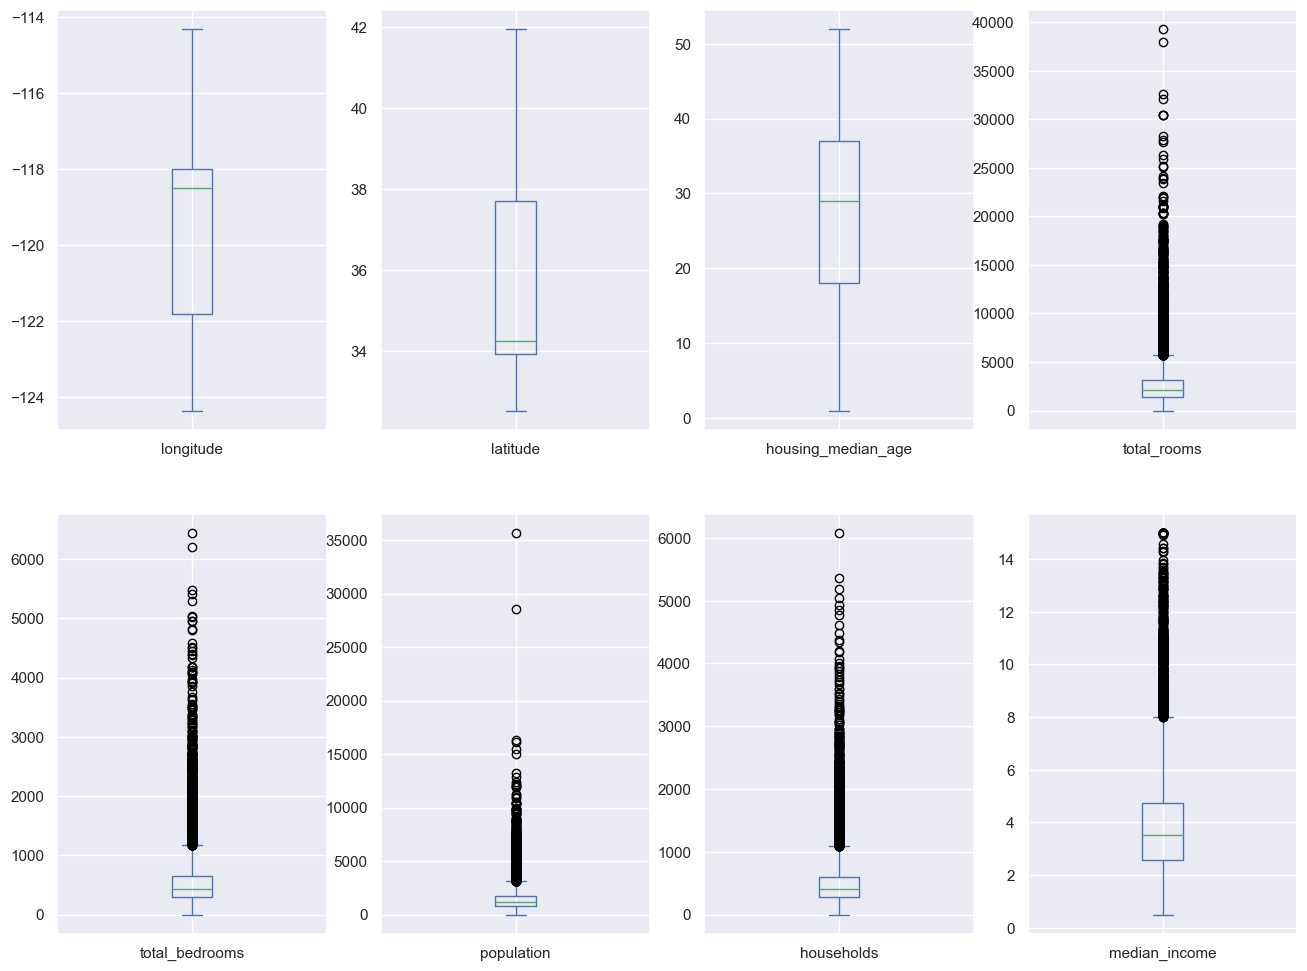

In [8]:
# Plot the distrubution of all numerical columns using boxplot (except the target):
fig, axs = plt.subplots(2, 4, figsize=(16, 12))
axs = axs.flatten()
for col, ax in zip(num_cols, axs):
    cal_housing_prices[col].plot.box(ax=ax)

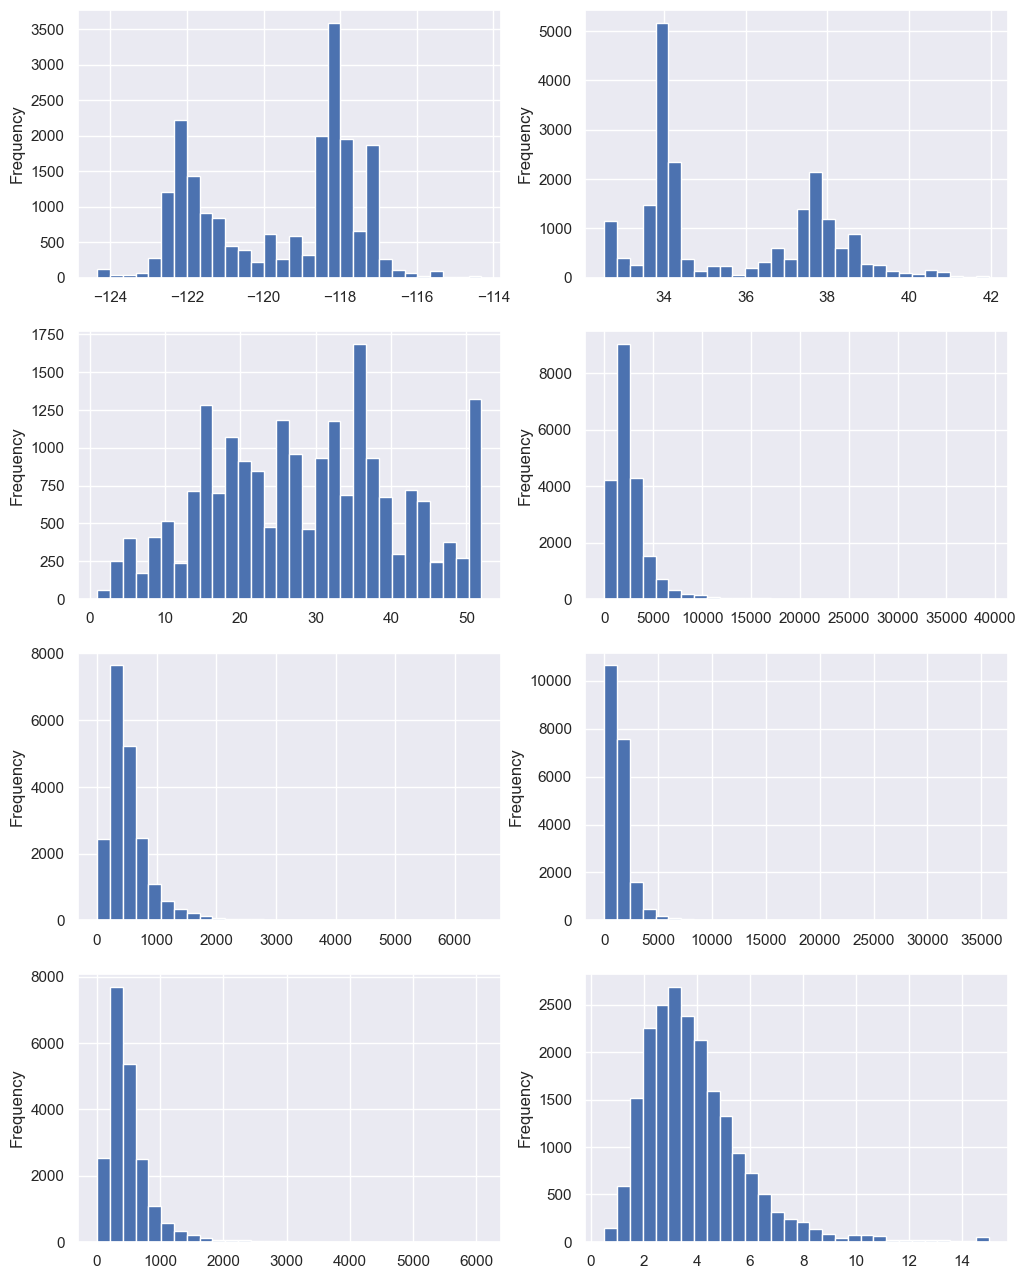

In [9]:
# Plot the distrubution of all numerical columns using histogram (except the target):
fig, axs = plt.subplots(4, 2, figsize=(12, 16))
axs = axs.flatten()
for col, ax in zip(num_cols, axs):
    cal_housing_prices[col].plot.hist(bins=30, ax=ax)

- **Further assessing:**

> - Is there any duplicates?

In [10]:
cal_housing_prices.duplicated().sum()

0

> - Is there any missing values?

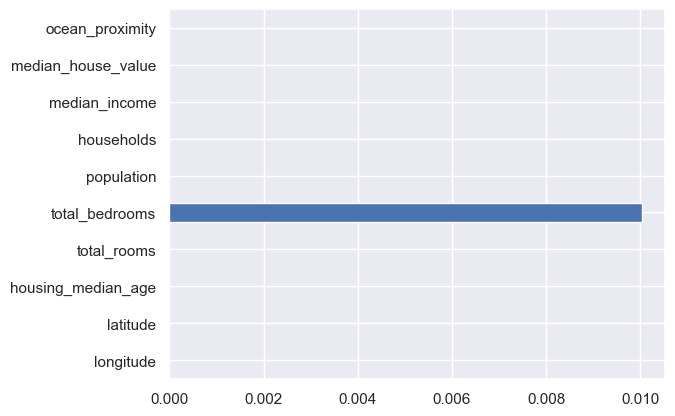

In [11]:
cal_housing_prices.isna().mean().plot.barh();

> - Check the cardinality of `ocean_proximity` column:

In [12]:
cal_housing_prices["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

- **Note that:**
> - There is **no duplicates**,
> - There is **some missing values**,
>> - Can be **dropped**,
> - Some columns may **need further processing**:
>> - `ocean_proximity`: **`object` --> 'category'**,
>> - Numerical columns --> **scaling**.

- **Data cleaning and preprocessing:**

In [13]:
# Drop all rows with missing values:
cal_housing_prices.dropna(inplace=True)

In [14]:
# Memory usage for ocean_proximity column:
(a := cal_housing_prices.memory_usage().sum())
print(f"Memory usage in kilobytes: {a / 1024}")

Memory usage in kilobytes: 1755.9609375


In [15]:
# Convert ocean_proximity to category & calculate difference in memory_usage:
cal_housing_prices[cat_cols] = cal_housing_prices[cat_cols].astype("category")
(b := cal_housing_prices.memory_usage().sum())
print(f"Difference in memory usage in kilobytes: {(a - b) / 1024}")

Difference in memory usage in kilobytes: 139.4716796875


## Step #03: Exploratory Data Analysis

### Screen the distribution of univariate numerical variables & the relationship between them all at one:

CPU times: total: 1min 4s
Wall time: 1min 14s


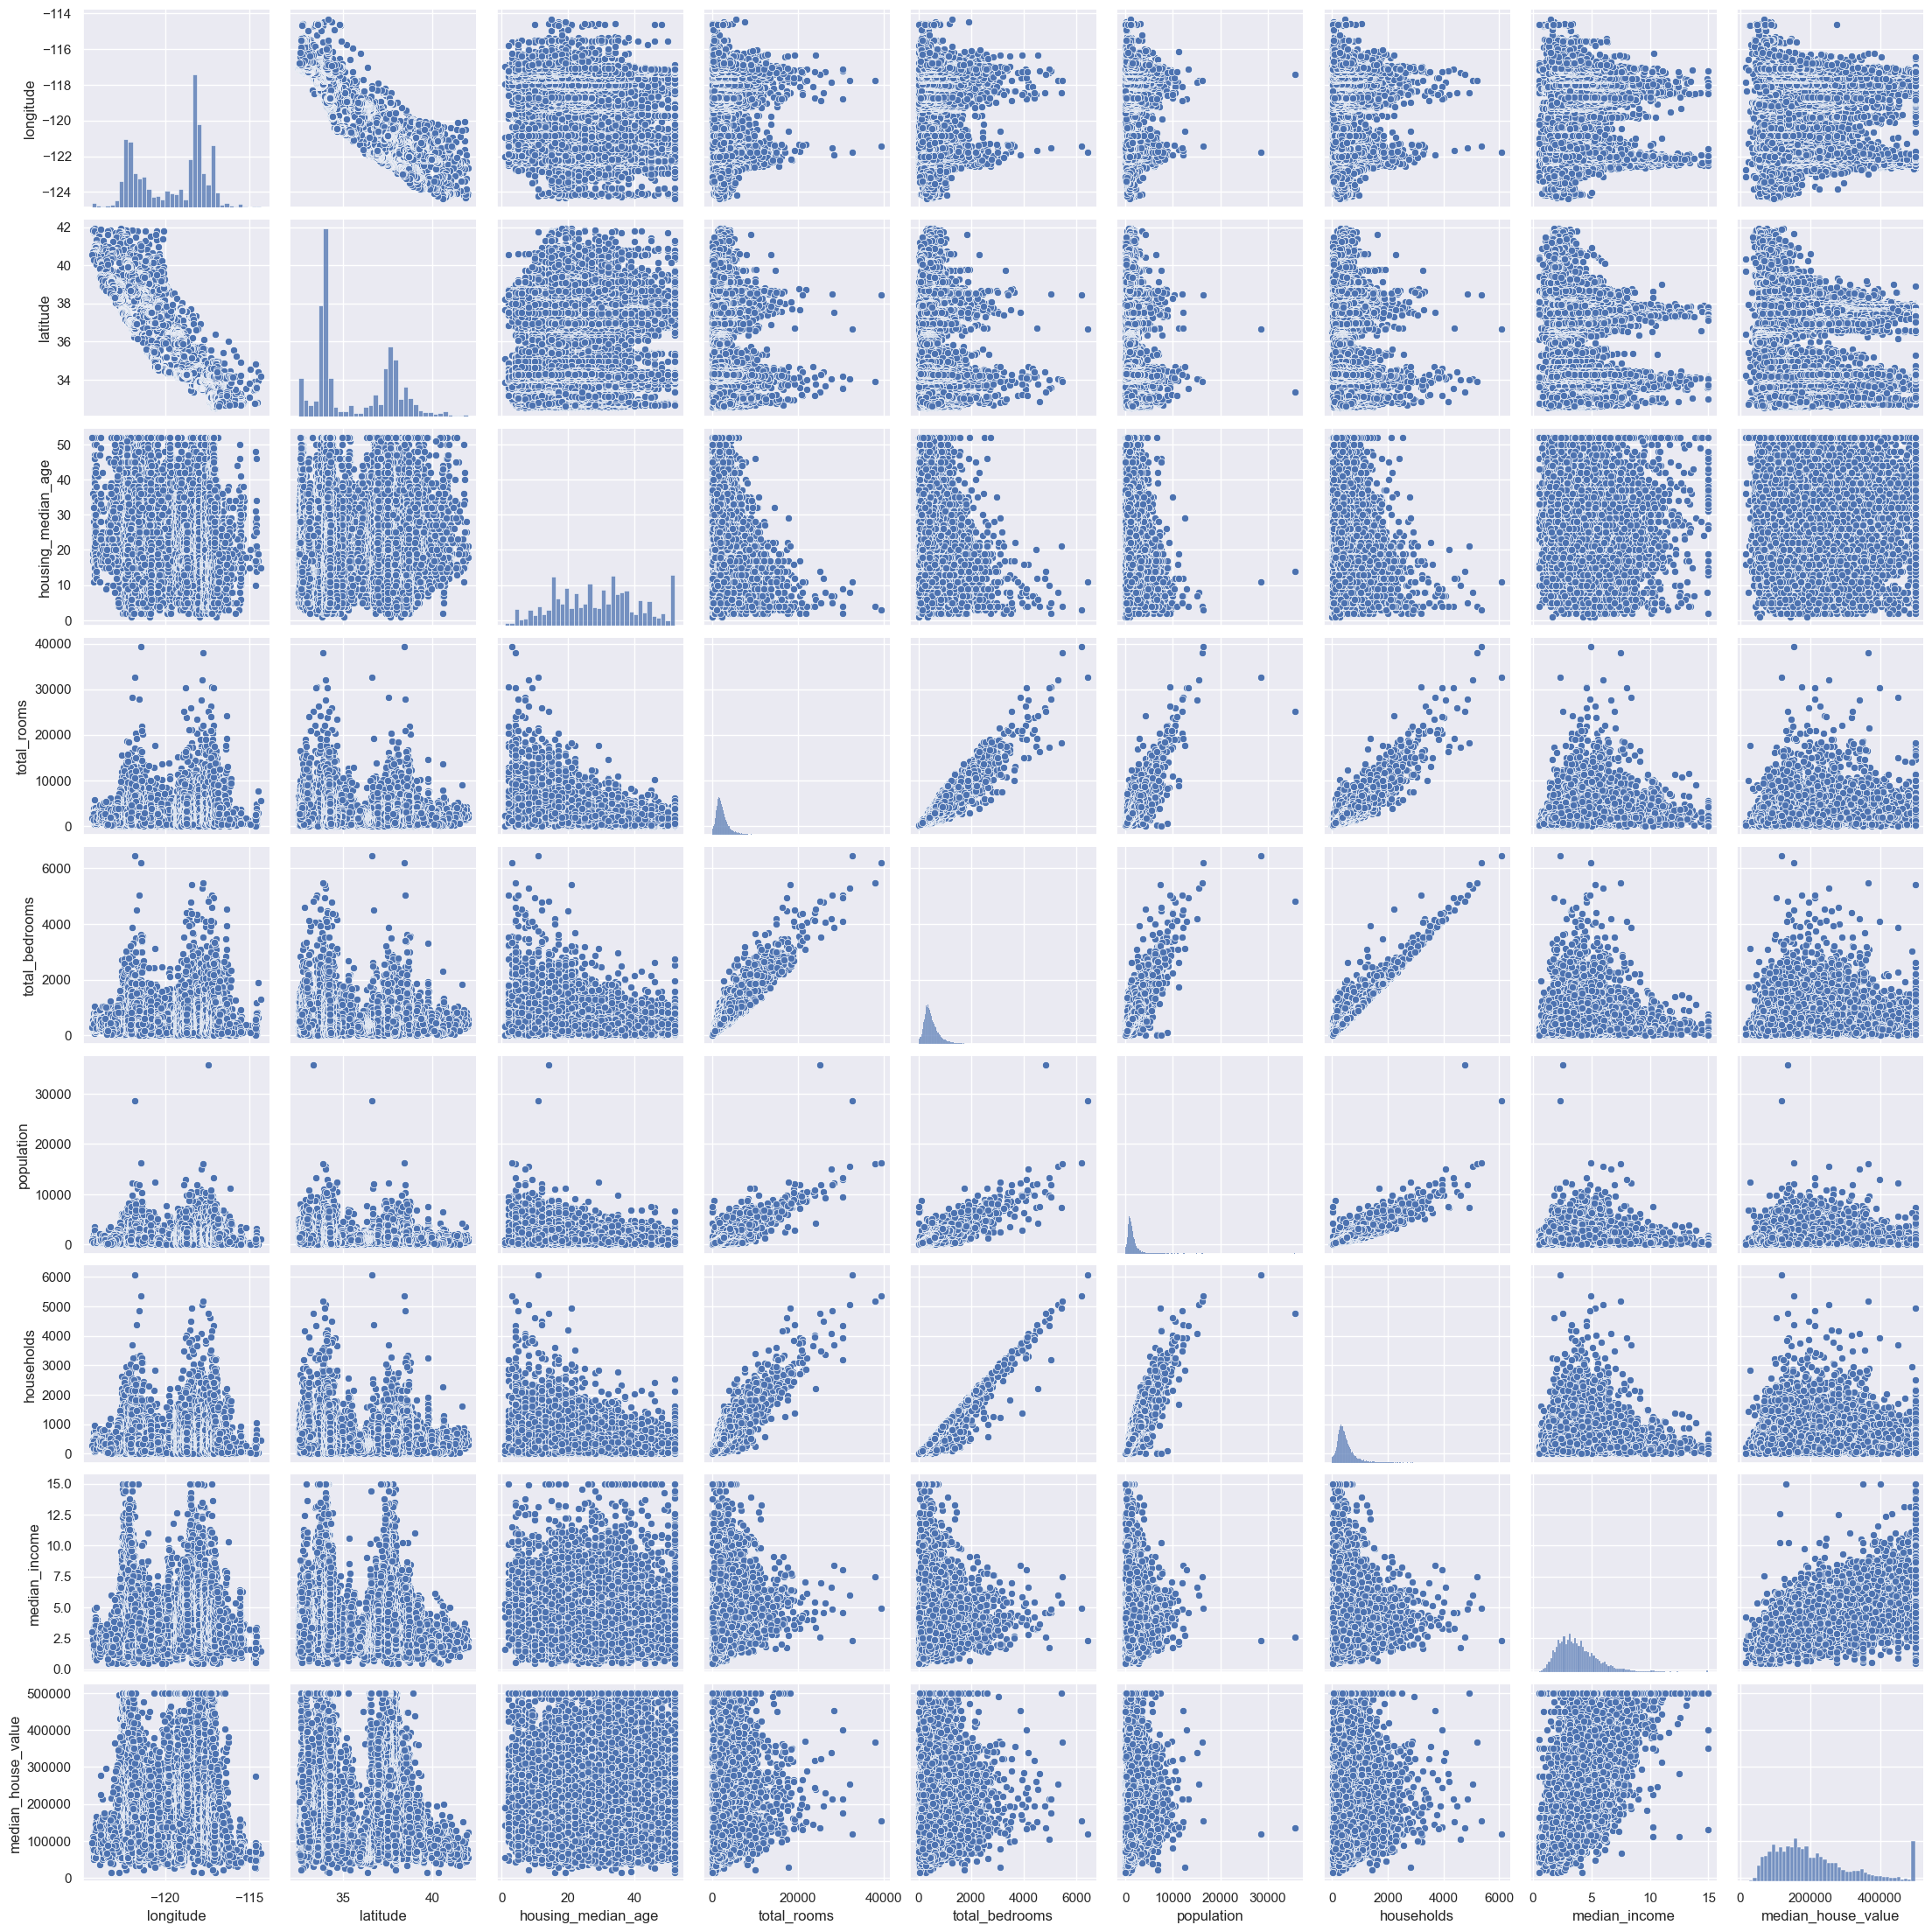

In [16]:
%%time
# Screen the data using seaborn paiplot:
sns.pairplot(cal_housing_prices);

## Step #04: Predict Housing Prices

### Furthe data preprocessing

- **Split the data into features & target:**

In [17]:
X = cal_housing_prices.drop(columns="median_house_value")
y = cal_housing_prices["median_house_value"]

- **Create a hold-out set:**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- **Perform log-transformation:**

In [19]:
# Define columns that need log-transformation:
log_tans_cols = deepcopy(num_cols)
log_tans_cols.remove("housing_median_age")

In [20]:
# Performing log-transformation:
X_train[log_tans_cols] = X_train[log_tans_cols].apply(lambda x: np.log(abs(x)))
X_test[log_tans_cols] = X_test[log_tans_cols].apply(lambda x: np.log(abs(x)))

- **Data distribution REVISTED!**

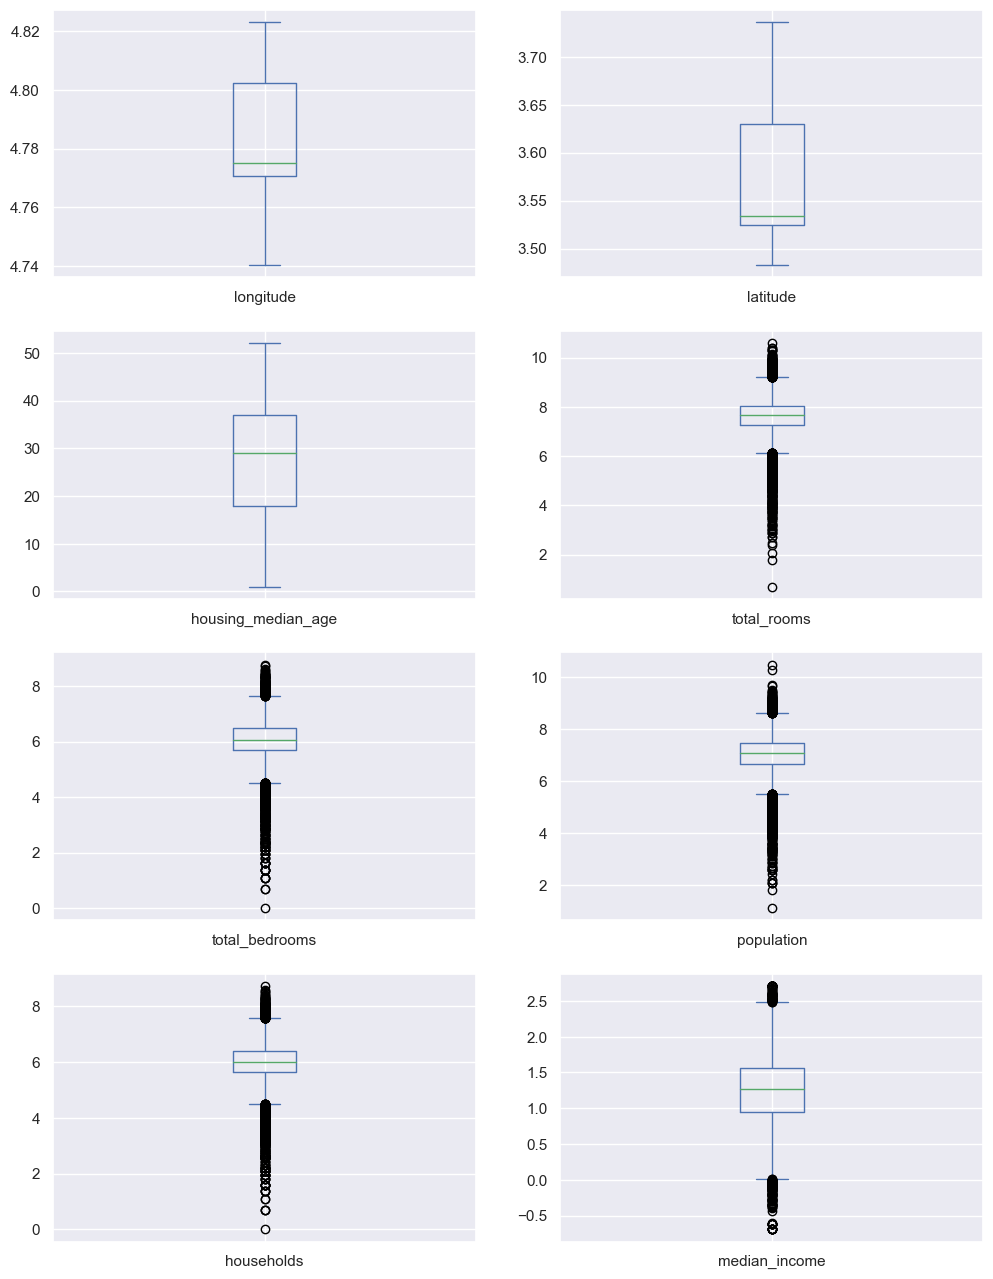

In [21]:
# Plot the data after log-transformation using boxplot:
fig, axs = plt.subplots(4, 2, figsize=(12, 16))
axs = axs.flatten()
for col, ax in zip(num_cols, axs):
    X_train[col].plot.box(ax=ax)

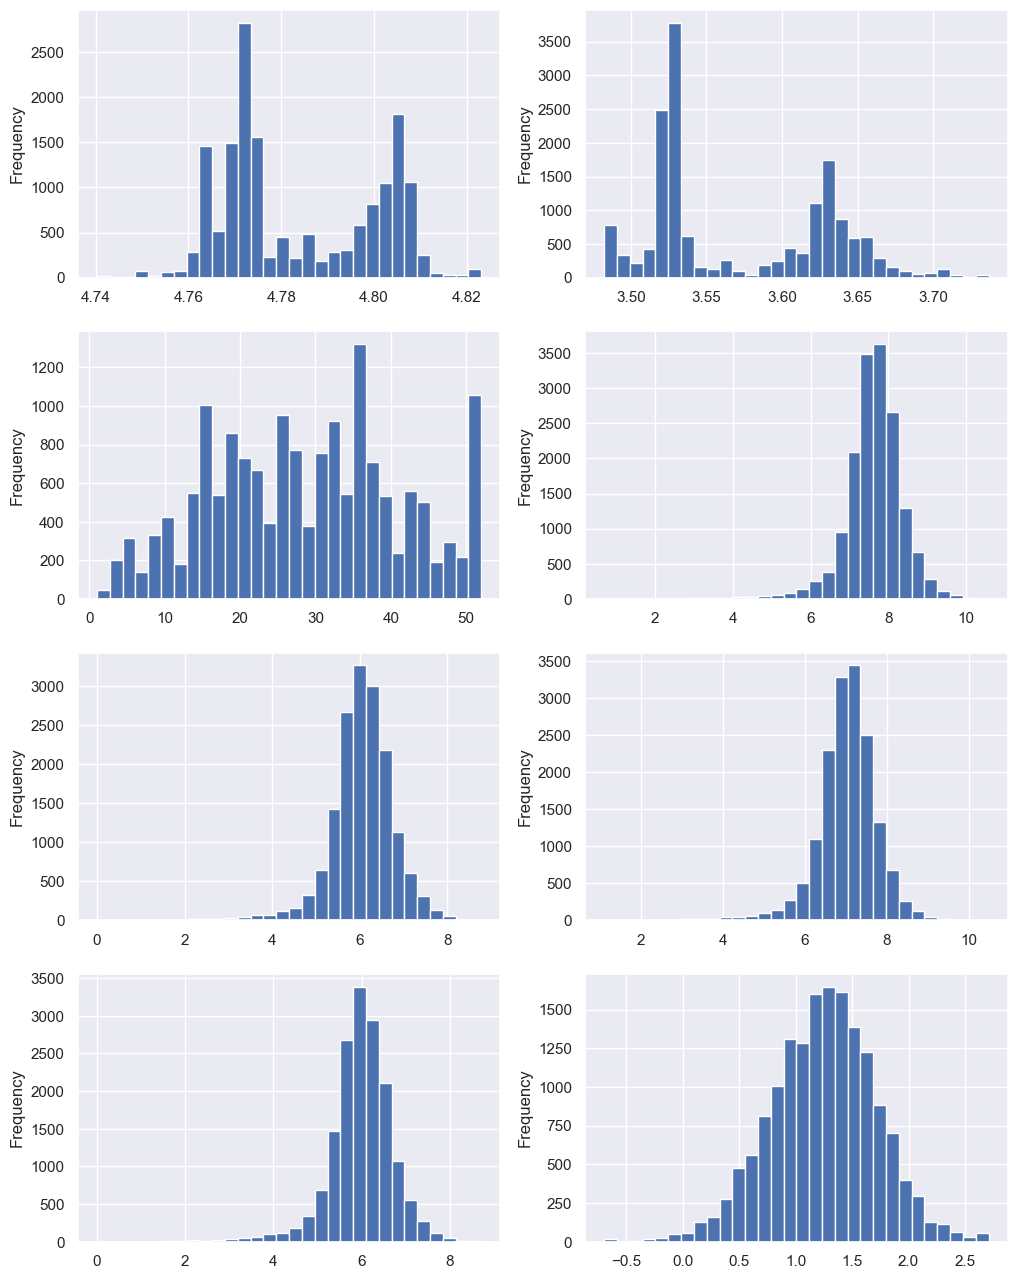

In [22]:
# Plot the data after log-transformation using histogram:
fig, axs = plt.subplots(4, 2, figsize=(12, 16))
axs = axs.flatten()
for col, ax in zip(num_cols, axs):
    X_train[col].plot.hist(bins=30, ax=ax)

- **Feature scaling:**

In [23]:
# Instantiate the transformers:
robust_scaler = RobustScaler()
cat_encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

In [24]:
# Create a column transformer:
transformer = ColumnTransformer(
    transformers=[("robust_scaler", robust_scaler, num_cols),
                  ("cat_encoder", cat_encoder, cat_cols)],
    remainder="passthrough")

In [25]:
# Fit to & transform the training set:
X_train_transformed = transformer.fit_transform(X_train)

In [26]:
# Explore the min, mean & max after transformation:
summary_stats = np.array([
    X_train_transformed.min(axis=0),
    X_train_transformed.mean(axis=0),
    X_train_transformed.max(axis=0)
])

summary_stats = pd.DataFrame(data=summary_stats, index=["min", "mean", "max"])
summary_stats

,0,1,2,3,4,5,6,7,8,9,10,11,12
min,-1.094389,-0.486429,-1.473684,-9.049510,-7.756340,-7.625317,-7.836072,-3.174317,0.000000,0.000000,0.000000,0.000000,0.000000
mean,0.279313,0.356378,-0.020262,-0.045222,-0.030029,-0.048853,-0.042127,-0.029821,0.442371,0.315429,0.000184,0.112688,0.129328
max,1.517770,1.912345,1.210526,3.789421,3.445838,4.376696,3.521998,2.344203,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
# Transform the training set:
X_test_transformed = transformer.transform(X_test)

### Model selection:

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [28]:
# Define a scoring function:
scorer = make_scorer(r2_score, greater_is_better=True)

For dummy_reg, results are:
  min = -0.06%
  mean = -0.03%
  max = -0.00%

For linear_reg, results are:
  min = 59.90%
  mean = 61.37%
  max = 62.88%

For tree_reg, results are:
  min = 62.92%
  mean = 65.06%
  max = 67.75%

For random_forest_reg, results are:
  min = 81.02%
  mean = 81.73%
  max = 82.75%

For adaboost_tree_reg, results are:
  min = 41.50%
  mean = 44.67%
  max = 46.99%



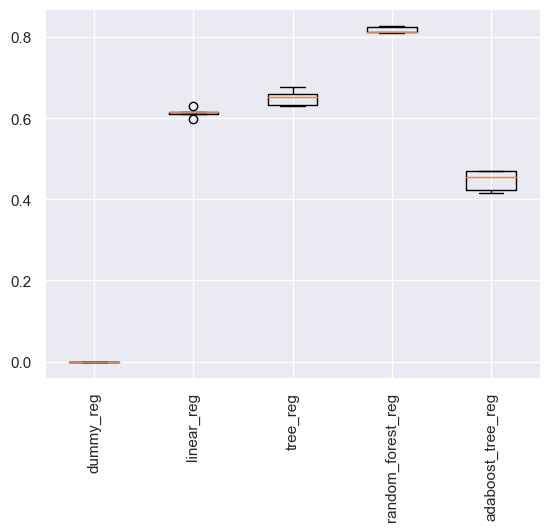

CPU times: total: 5min 34s
Wall time: 6min 25s


In [29]:
%%time
# Compare different models:
%run "./helpers/validate_model.py";
results = compare_models(
    X_train_transformed, y_train, scorer,
    dummy_reg=DummyRegressor(),
    linear_reg=LinearRegression(),
    tree_reg=DecisionTreeRegressor(random_state=42),
    random_forest_reg=RandomForestRegressor(),
    adaboost_tree_reg=AdaBoostRegressor()
);

### Model debugging:

#### Plot the learning curve:

https://scikit-learn.org/stable/modules/learning_curve.html#learning-curve

> - We can gain further insight by exploring the behavior of the model as a function of the number of training points, which we can do by using increasingly larger subsets of the data to fit our model.
> - A plot of the training/validation score with respect to the size of the training set is sometimes known as a learning curve.
> - The general behavior we would expect from a learning curve is this:
>> - A model of a given complexity will overfit a small dataset: this means the training score will be relatively high, while the validation score will be relatively low.
>> - A model of a given complexity will underfit a large dataset: this means that the training score will decrease, but the validation score will increase.
>> - A model will never, except by chance, give a better score to the validation set than the training set: this means the curves should keep getting closer together but
never cross.

##### Plot the learning curve for `random_forest_reg`:

In [30]:
# Instantiate the model:
random_forest_reg = RandomForestRegressor(random_state=42)

In [31]:
%%time
# Perform CV on different sample sizes:
train_sizes, train_scores, test_scores = learning_curve(
    random_forest_reg,
    X_train_transformed, y_train,
    train_sizes=np.linspace(0.01, 1.0, 10),
    cv=5, scoring=scorer, random_state=42, n_jobs=-1
)

CPU times: total: 375 ms
Wall time: 4min 38s


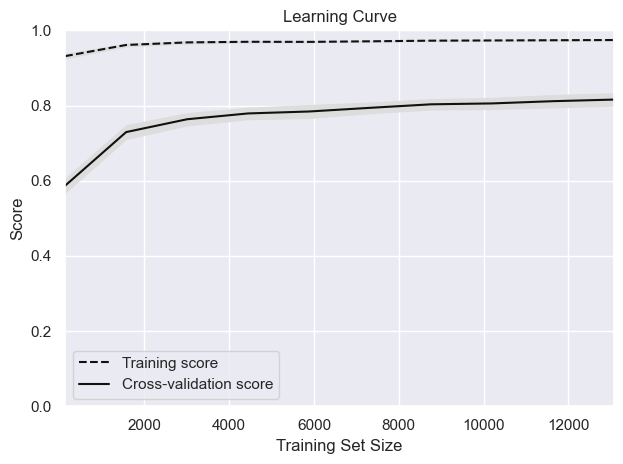

In [32]:
# Plot the learning curve:
%run "./helpers/plot_learning_validation_curve.py"
plot_learning_curve(train_sizes, train_scores, test_scores);

> - The training & validation scores don't converge (generalization error).
> - No room for improvement by adding more data.

#### Model (hyperparametrs) tuning:

- Hyperparameters are those parameters thar are set before training the model and determine its overall structure and behavior.
- Tuning of hyperparameters involves searching for best combination of hyperparameters for a model, it is an essential step in machine learning pipeline.
- Examples of hyperparameters for a random forest regressor model include:
> - `n_estimators`,
> - `max_features`,
> - `max_depth`,
> - `min_samples_split`,
> - `min_samples_leaf`.
- So the next step is to understand how the performance of a model changes as the value of some hyperparameter changes, starting by a DUMMY approach and then proceeding to a MORE STRUCTURED one (using different search techniques).

##### Tuning `n_estimators`:

In [33]:
# Instantiate the model:
random_forest_reg = RandomForestRegressor(random_state=42)

In [34]:
# Create range of values for the hyperparameter in question:
n_estimators = [int(x) for x in np.linspace(start=100, stop=400, num=4)]

In [35]:
%%time
# Perform CV using different hyperparametr values:
train_scores, test_scores = validation_curve(
    random_forest_reg,
    X_train_transformed, y_train,
    param_name="n_estimators",
    param_range=n_estimators,
    cv=3, scoring=scorer, n_jobs=-1
)

CPU times: total: 125 ms
Wall time: 4min 33s


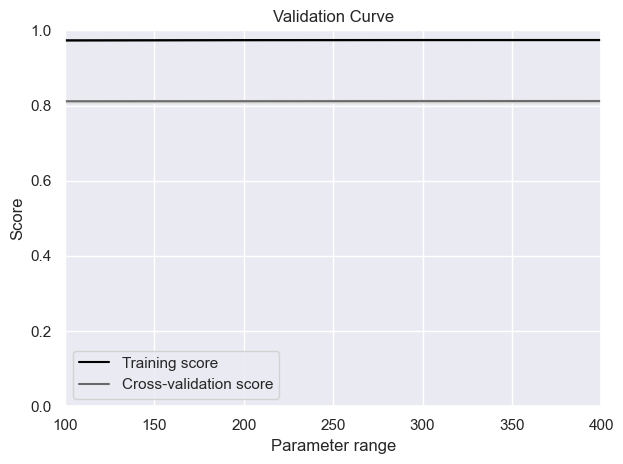

In [36]:
# Plot the validation curve:
%run "./helpers/plot_learning_validation_curve.py"
plot_validation_curve(n_estimators, train_scores, test_scores)

##### Tuning `max_features`:

In [37]:
# Instantiate the model:
random_forest_reg = RandomForestRegressor(random_state=42)

In [38]:
# Create range of values for the hyperparameter in question:
max_features = [round(x, 1) for x in np.linspace(start=0.3, stop=0.6, num=4)]

In [39]:
%%time
# Perform CV using different hyperparametr values:
train_scores, test_scores = validation_curve(
    random_forest_reg,
    X_train_transformed, y_train,
    param_name="max_features",
    param_range=max_features,
    cv=3, scoring=scorer, n_jobs=-1
)

CPU times: total: 78.1 ms
Wall time: 46.9 s


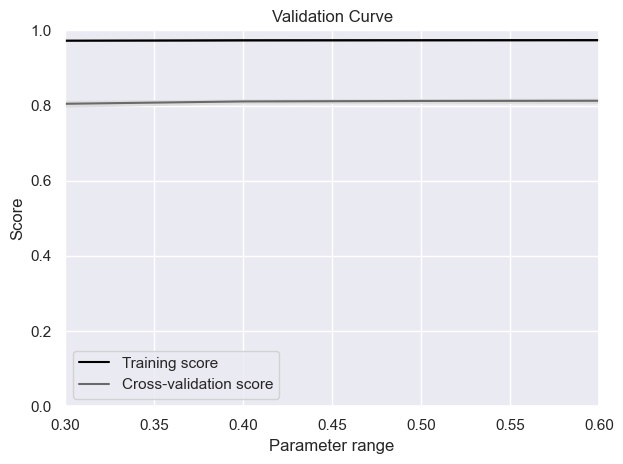

In [40]:
# Plot the validation curve:
%run "./helpers/plot_learning_validation_curve.py"
plot_validation_curve(max_features, train_scores, test_scores)

##### Tuning `max_depth`:

In [41]:
# Instantiate the model:
random_forest_reg = RandomForestRegressor(random_state=42)

In [42]:
# Create range of values for the hyperparameter in question:
max_depth = [int(x) for x in np.linspace(30, 60, num=4)]

In [43]:
%%time
# Perform CV using different hyperparametr values:
train_scores, test_scores = validation_curve(
    random_forest_reg,
    X_train_transformed, y_train,
    param_name="max_depth",
    param_range=max_depth,
    cv=3, scoring=scorer, n_jobs=-1
)

CPU times: total: 109 ms
Wall time: 1min 29s


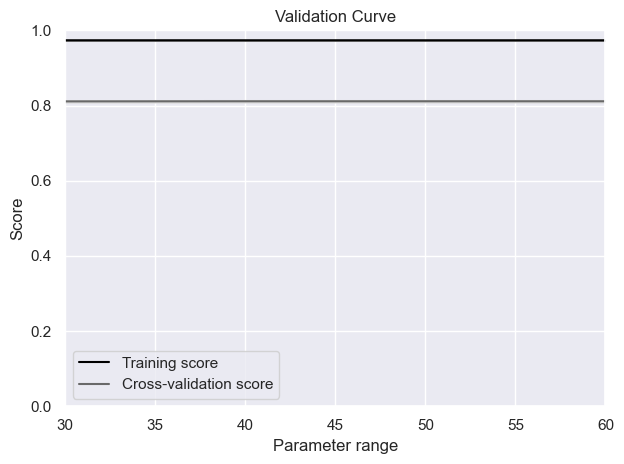

In [44]:
# Plot the validation curve:
%run "./helpers/plot_learning_validation_curve.py"
plot_validation_curve(max_depth, train_scores, test_scores)

##### Tuning `min_samples_split`:

In [45]:
# Instantiate the model:
random_forest_reg = RandomForestRegressor(random_state=42)

In [46]:
# Create range of values for the hyperparameter in question:
min_samples_split = [int(x) for x in np.linspace(10, 100, num=4)]

In [47]:
%%time
# Perform CV using different hyperparametr values:
train_scores, test_scores = validation_curve(
    random_forest_reg,
    X_train_transformed, y_train,
    param_name="min_samples_split",
    param_range=min_samples_split,
    cv=3, scoring=scorer, n_jobs=-1
)

CPU times: total: 46.9 ms
Wall time: 54.3 s


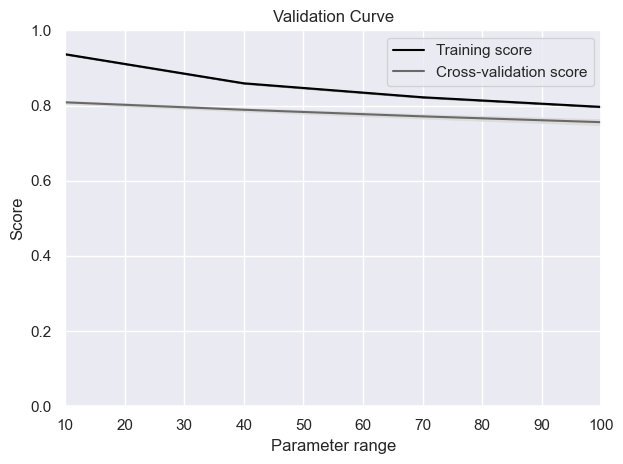

In [48]:
# Plot the validation curve:
%run "./helpers/plot_learning_validation_curve.py"
plot_validation_curve(min_samples_split, train_scores, test_scores)

##### Tuning `min_samples_leaf`:

In [49]:
# Instantiate the model:
random_forest_reg = RandomForestRegressor(random_state=42)

In [50]:
# Create range of values for the hyperparameter in question:
min_samples_leaf = [int(x) for x in np.linspace(start=10, stop=100, num=4)]

In [51]:
%%time
# Perform CV using different hyperparametr values:
train_scores, test_scores = validation_curve(
    random_forest_reg,
    X_train_transformed, y_train,
    param_name="min_samples_leaf",
    param_range=min_samples_leaf,
    cv=3, scoring=scorer, n_jobs=-1
)

CPU times: total: 62.5 ms
Wall time: 35.6 s


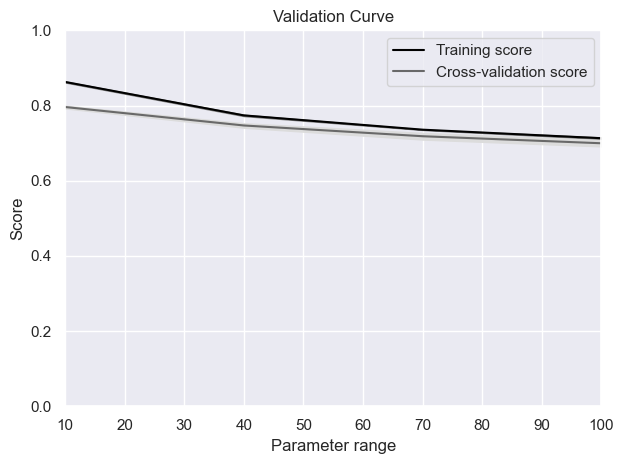

In [52]:
# Plot the validation curve:
%run "./helpers/plot_learning_validation_curve.py"
plot_validation_curve(min_samples_leaf, train_scores, test_scores)

##### Perform randomized search over the suggested `param_distribution` to find the best combination:

In [53]:
# Instantiate the model:
random_forest_reg = RandomForestRegressor(random_state=42)

In [54]:
# Define the hyperparameter distribution to search over:
param_distributions = {
    "n_estimators": [int(x) for x in np.linspace(start=100, stop=200, num=2)],
    "max_features": [round(x, 1) for x in np.linspace(start=0.5, stop=1.0, num=2)],
    "max_depth": [int(x) for x in np.linspace(40, 100, num=4)],
    "min_samples_split": [int(x) for x in np.linspace(10, 100, num=5)],
    "min_samples_leaf": [int(x) for x in np.linspace(start=10, stop=100, num=5)]
}

In [55]:
# Define the RandomizedSearchCV object:
random_search_cv = RandomizedSearchCV(
    estimator=random_forest_reg,
    param_distributions=param_distributions,
    n_iter=50,
    return_train_score=True,
    cv=5,
    random_state=42,
    n_jobs=-1
)

In [56]:
%%time
# Fit the RandomizedsearchCV object to the training data:
random_search_cv.fit(X_train_transformed, y_train);

CPU times: total: 22.5 s
Wall time: 14min 38s


In [57]:
# Print the results:
cv_results = pd.DataFrame(random_search_cv.cv_results_)
hyperparams = ["param_" + p for p in param_distributions.keys()]
cols = ["mean_fit_time", "mean_test_score", "rank_test_score"] + hyperparams
imp_cv_results = cv_results[cols].set_index("rank_test_score").sort_index()
imp_cv_results.head()

,mean_fit_time,mean_test_score,param_n_estimators,param_max_features,param_max_depth,param_min_samples_split,param_min_samples_leaf
rank_test_score,,,,,,,
1,12.152808,0.799607,100,0.5,40,10,10
2,28.742016,0.783279,200,1.0,40,55,10
3,6.894214,0.782193,100,0.5,60,55,10
4,27.582329,0.772728,200,1.0,40,77,10
5,14.410075,0.772026,100,1.0,40,77,10


In [58]:
# Print the best score achievd:
random_search_cv.best_score_

0.7996070205398352

In [59]:
# Print the best hyperparameters found:
best_params = random_search_cv.best_params_
best_params

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_features': 0.5,
 'max_depth': 40}

In [60]:
# Pickle the best model found:
import pickle
best_random_forest_reg = random_search_cv.best_estimator_
with open("./assets/best_model.pkl", mode="wb") as file_bin:
    pickle.dump(best_random_forest_reg, file_bin)